<a href="https://colab.research.google.com/github/ng13/AI_wrkshp/blob/main/2_Linear_Regression_logistic_regression_decision_tree_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Hands-on Session

### Linear regression
Multiple linear regression is simply the linear regression extended to problems where the dependent or output variable is determined by more than one independent variable.<br>

#####  $\hat{y}$ (w, x) = w_0 + w_1 * x_1 + ... + w_p * x_ps

#### Dataset
The dataset is available at __"https://github.com/DeepConnectAI/challenge-week-2/raw/master/data/multiple_linear_data.csv"__ in the respective challenge's repo.<br><br>

This is the __modified version__ of the dataset *'Student Performance'* provided by UCI Machine Learning repository.<br>
Original dataset: https://archive.ics.uci.edu/ml/datasets/student+performance

#### Features (X)
1. age - student's age (numeric: from 15 to 22)
2. address - student's home address type (binary: 'U' - urban or 'R' - rural)
3. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
4. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
5. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
6. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
7. schoolsup - extra educational support (binary: yes or no)
8. famsup - family educational support (binary: yes or no)
9. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
10. activities - extra-curricular activities (binary: yes or no)
11. higher - wants to take higher education (binary: yes or no)
12. internet - Internet access at home (binary: yes or no)
13. romantic - with a romantic relationship (binary: yes or no)
14. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
15. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
16. health - current health status (numeric: from 1 - very bad to 5 - very good)
17. absences - number of school absences (numeric: from 0 to 93)
18. G1 - first year math grades (numeric: from 0 to 100)
19. G2 - second year math grades (numeric: from 0 to 100)

#### Output target (Y)
20. G3 - final year math grades (numeric: from 0 to 100, output target)

#### Objective
To learn multiple linear regression and practice handling categorical features


In [1]:
!wget https://github.com/DeepConnectAI/challenge-week-2/raw/master/data/multiple_linear_data.csv

--2025-09-30 10:15:14--  https://github.com/DeepConnectAI/challenge-week-2/raw/master/data/multiple_linear_data.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/multiple_linear_data.csv [following]
--2025-09-30 10:15:14--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-2/master/data/multiple_linear_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24764 (24K) [text/plain]
Saving to: ‘multiple_linear_data.csv’

multiple_linear_dat 100%[===================>]  24.18K  --.-KB/s    in 0.01s   

2025-09-30 10:15:14 (2.23 MB/s) - ‘m

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
# NOTE: DO NOT CHANGE THE VARIABLE NAME(S) IN THIS CELL
# Load the data
data = pd.read_csv("multiple_linear_data.csv")
data.head()

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,U,GT3,course,2,0,yes,no,no,no,yes,no,no,3,4,3,6,25,30,30
1,17,U,GT3,course,2,0,no,yes,no,no,yes,yes,no,3,3,3,4,25,25,30
2,15,U,LE3,other,2,3,yes,no,yes,no,yes,yes,no,3,2,3,10,35,40,50
3,15,U,GT3,home,3,0,no,yes,yes,yes,yes,yes,yes,2,2,5,2,75,70,75
4,16,U,GT3,home,2,0,no,yes,yes,no,yes,no,no,3,2,5,4,30,50,50


In [4]:
# You may need original list of columns to interpret the features after transformation, maybe
orig_cols = data.columns
orig_cols

Index(['age', 'address', 'famsize', 'reason', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet',
       'romantic', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [5]:
# Handle categorical values
le=LabelEncoder()
col=data.select_dtypes(exclude=['int64']).columns.tolist()
data[col]=data[col].apply(le.fit_transform)

In [6]:
data

,age,address,famsize,reason,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,18,1,0,0,2,0,1,0,0,0,1,0,0,3,4,3,6,25,30,30
1,17,1,0,0,2,0,0,1,0,0,1,1,0,3,3,3,4,25,25,30
2,15,1,1,2,2,3,1,0,1,0,1,1,0,3,2,3,10,35,40,50
3,15,1,0,1,3,0,0,1,1,1,1,1,1,2,2,5,2,75,70,75
4,16,1,0,1,2,0,0,1,1,0,1,0,0,3,2,5,4,30,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,1,0,2,2,0,1,1,0,1,0,0,5,4,4,11,45,45,45
391,17,1,1,0,1,0,0,0,0,0,1,1,0,4,5,2,3,70,80,80
392,21,0,0,0,1,3,0,0,0,0,1,0,0,5,3,3,3,50,40,35
393,18,0,1,0,1,0,0,0,0,0,1,1,0,4,1,5,0,55,60,50


In [7]:
# Define your X and y
X= data[data.columns[0:19]].values
y= data[data.columns[19:]].values

In [8]:
# Initialize the model
model=LinearRegression()

In [9]:
# Fit the model. Wait! We will complete this step for you ;)
model.fit(X, y)

LinearRegression()

In [10]:
# Print mean squared error
y_preds = model.predict(X)
mse=mean_squared_error(y,y_preds)
print(f"\nMSE: {mse}")


MSE: 85.71253099296837


## Support Vector Machine

In [11]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [12]:
y_preds = regr.predict(X)
mse=mean_squared_error(y,y_preds)
print(f"\nMSE: {mse}")



MSE: 275.5876600451723


## Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(max_depth=3, random_state=0)
rfmodel.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3, random_state=0)

In [14]:
y_preds = rfmodel.predict(X)
mse=mean_squared_error(y,y_preds)
print(f"\nMSE: {mse}")


MSE: 58.804720421187405


In [15]:
y_preds

array([31.64392245, 30.90008202, 44.82036904, 72.23243089, 48.46260335,
       76.02472284, 59.23083789, 30.90008202, 90.36879801, 76.02472284,
       25.50752939, 59.07468103, 72.23243089, 48.46260335, 77.47226623,
       72.23243089, 72.23243089, 48.46260335, 30.90008202, 48.46260335,
       72.23243089, 76.02472284, 76.02472284, 65.14702661, 45.43555572,
       45.27200511, 59.23083789, 77.47226623, 55.10518925, 59.07468103,
       55.10518925, 77.47226623, 77.47226623, 38.91216175, 72.23243089,
       13.98275768, 77.47226623, 77.47226623, 59.23083789, 65.14702661,
       48.29905274, 59.23083789, 90.36879801, 27.08362264, 48.29905274,
       44.91745237, 59.07468103, 90.36879801, 76.02472284, 35.024319  ,
       65.14702661, 65.14702661, 55.03872197, 40.488255  , 65.14702661,
       45.43555572, 76.02472284, 76.02472284, 48.46260335, 77.47226623,
       55.10518925, 44.91745237, 48.46260335, 45.43555572, 40.488255  ,
       76.02472284, 65.14702661, 35.024319  , 45.43555572, 77.47

In [16]:
# Predict on your own data
new_data = [21,1,2,1,1,1,0,1,1,0,0,1,2,3,1,1,4,87,54]
print("Predicted grade:",model.predict([new_data]))

Predicted grade: [[51.20382551]]


In [17]:
from xgboost import XGBRegressor


xgbm = XGBRegressor(objective='reg:squarederror', # Specify the objective for regression
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         random_state=42)

    # Train the model
xgbm.fit(X, y)
y_preds = xgbm.predict(X)
mse=mean_squared_error(y,y_preds)
print(f"\nMSE: {mse}")


MSE: 4.1409993171691895


### Logistic regression
Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as W) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a continuous value.<br>

###  $\hat{y}(w, x) = \frac{1}{1+exp^{-(w_0 + w_1 * x_1 + ... + w_p * x_p)}}$

#### Dataset
The dataset is available at <strong>"data/divorce.csv"</strong> in the respective challenge's repo.<br>
<strong>Original Source:</strong> https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set. Dataset is based on rating for questionnaire filled by people who already got divorse and those who is happily married.<br><br>

[//]: # "The dataset is available at http://archive.ics.uci.edu/ml/machine-learning-databases/00520/data.zip. Unzip the file and use either CSV or xlsx file.<br>"


#### Features (X)
1. Atr1 - If one of us apologizes when our discussion deteriorates, the discussion ends. (Numeric | Range: 0-4)
2. Atr2 - I know we can ignore our differences, even if things get hard sometimes. (Numeric | Range: 0-4)
3. Atr3 - When we need it, we can take our discussions with my spouse from the beginning and correct it. (Numeric | Range: 0-4)
4. Atr4 - When I discuss with my spouse, to contact him will eventually work. (Numeric | Range: 0-4)
5. Atr5 - The time I spent with my wife is special for us. (Numeric | Range: 0-4)
6. Atr6 - We don't have time at home as partners. (Numeric | Range: 0-4)
7. Atr7 - We are like two strangers who share the same environment at home rather than family. (Numeric | Range: 0-4)

&emsp;.<br>
&emsp;.<br>
&emsp;.<br>
<br>
54. Atr54 - I'm not afraid to tell my spouse about her/his incompetence. (Numeric | Range: 0-4)
<br><br>
Take a look above at the source of the original dataset for more details.

#### Target (y)
55. Class: (Binary | 1 => Divorced, 0 => Not divorced yet)

#### Objective
To gain understanding of logistic regression through implementing the model from scratch

#### Tasks
- Download and load the data (csv file contains ';' as delimiter)
- Add column at position 0 with all values=1 (pandas.DataFrame.insert function). This is for input to the bias $w_0$
- Define X matrix (independent features) and y vector (target feature) as numpy arrays
- Print the shape and datatype of both X and y
[//]: # "- Dataset contains missing values, hence fill the missing values (NA) by performing missing value prediction"
[//]: # "- Since the all the features are in higher range, columns can be normalized into smaller scale (like 0 to 1) using different methods such as scaling, standardizing or any other suitable preprocessing technique (sklearn.preprocessing.StandardScaler)"
- Split the dataset into 85% for training and rest 15% for testing (sklearn.model_selection.train_test_split function)
- Print other classification metrics such as:
    - classification report (sklearn.metrics.classification_report),
    - confusion matrix (sklearn.metrics.confusion_matrix),
    - precision, recall and f1 scores (sklearn.metrics.precision_recall_fscore_support)

#### Helpful links
- How Logistic Regression works: https://machinelearningmastery.com/logistic-regression-for-machine-learning/
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Training testing splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [19]:
# Download the dataset from the source
!wget https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/divorce.csv

--2025-09-30 10:21:06--  https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/divorce.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv [following]
--2025-09-30 10:21:07--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19021 (19K) [text/plain]
Saving to: ‘divorce.csv’

divorce.csv         100%[===================>]  18.58K  --.-KB/s    in 0.009s  

2025-09-30 10:21:07 (1.98 MB/s) - ‘divorce.csv’ saved [19021/19021]



In [20]:
# Read the data from local cloud directory
data = np.loadtxt(open("/content/divorce.csv", "rb"), delimiter=";", skiprows=1)
# Set delimiter to semicolon(;) in case of unexpected results
print(data)

[[2. 2. 4. ... 2. 1. 1.]
 [4. 4. 4. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 3. 1. 0.]
 [0. 0. 0. ... 3. 1. 0.]]


In [21]:
# Add column which has all 1s
# The idea is that weight corresponding to this column is equal to intercept
# This way it is efficient and easier to handle the bias/intercept term
wdata = np.ones((data.shape[0],data.shape[1]+1), dtype=int)
wdata[:,1:] = data

In [23]:
# Print the dataframe rows just to see some samples
wdata

array([[1, 2, 2, ..., 2, 1, 1],
       [1, 4, 4, ..., 2, 2, 1],
       [1, 2, 2, ..., 2, 2, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 3, 1, 0],
       [1, 0, 0, ..., 3, 1, 0]])

In [24]:
# Define X (input features) and y (output feature)
X = wdata[:,:-1]
y = wdata[:,-1]

In [25]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(170, 55)
y: Type-<class 'numpy.ndarray'>, Shape-(170,)


In [26]:
# Split the dataset into training and testing here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [27]:
# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==y_train.shape[0] and X_test.shape[0]==y_test.shape[0]), "Check your splitting carefully"

X_train: (127, 55) , y_train: (127,)
X_test: (43, 55) , y_test: (43,)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
# Define X and y
X = wdata[:,:-1]
y = wdata[:,-1]

In [31]:
# Initialize the model from sklearn
model = LogisticRegression(solver='liblinear', random_state=0)

In [32]:
# Fit the model
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [33]:
# Predict on testing set X_test
y_pred_sk = model.predict(X_test)

In [34]:
# Print Accuracy on testing set
test_accuracy_sklearn = accuracy_score(y_test,y_pred_sk)*100

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 95.34883720930233


In [38]:
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_sk = clf2.predict(X_test)

In [40]:
test_accuracy_sklearn = accuracy_score(y_test,y_pred_sk)*100

print(f"\nAccuracy on testing set: {test_accuracy_sklearn}")


Accuracy on testing set: 95.34883720930233


## Decision Tree Visualization

### Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each node finds the best threshold on that feature to further classify/predict more accurately, each branch represents an outcome of that threshold, and each leaf node holds a class label.
<br><br>
<img src="https://github.com/DeepConnectAI/challenge-week-4/blob/master/data/image1.PNG?raw=1">

In [41]:
from matplotlib import pyplot as plt # For plotting
from sklearn import datasets # For loading standard datasets
from sklearn.tree import DecisionTreeClassifier # To run decision tree model
from sklearn import tree # to visualize decision trees

#### Iris Dataset Description:
- Classes: 3
- Samples per class: 50
- Samples total: 150
- Dimesionaltiy: 4
- Source: https://archive.ics.uci.edu/ml/datasets/iris

<br>
<strong>Quick Tip:</strong> sklearn.datasets has some toy datasets, the package also has helpers to fetch larger datasets commonly used by the machine learning community

In [ ]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# initialise and then Fit the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [ ]:
# Gives text representation to the decision tree trained
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



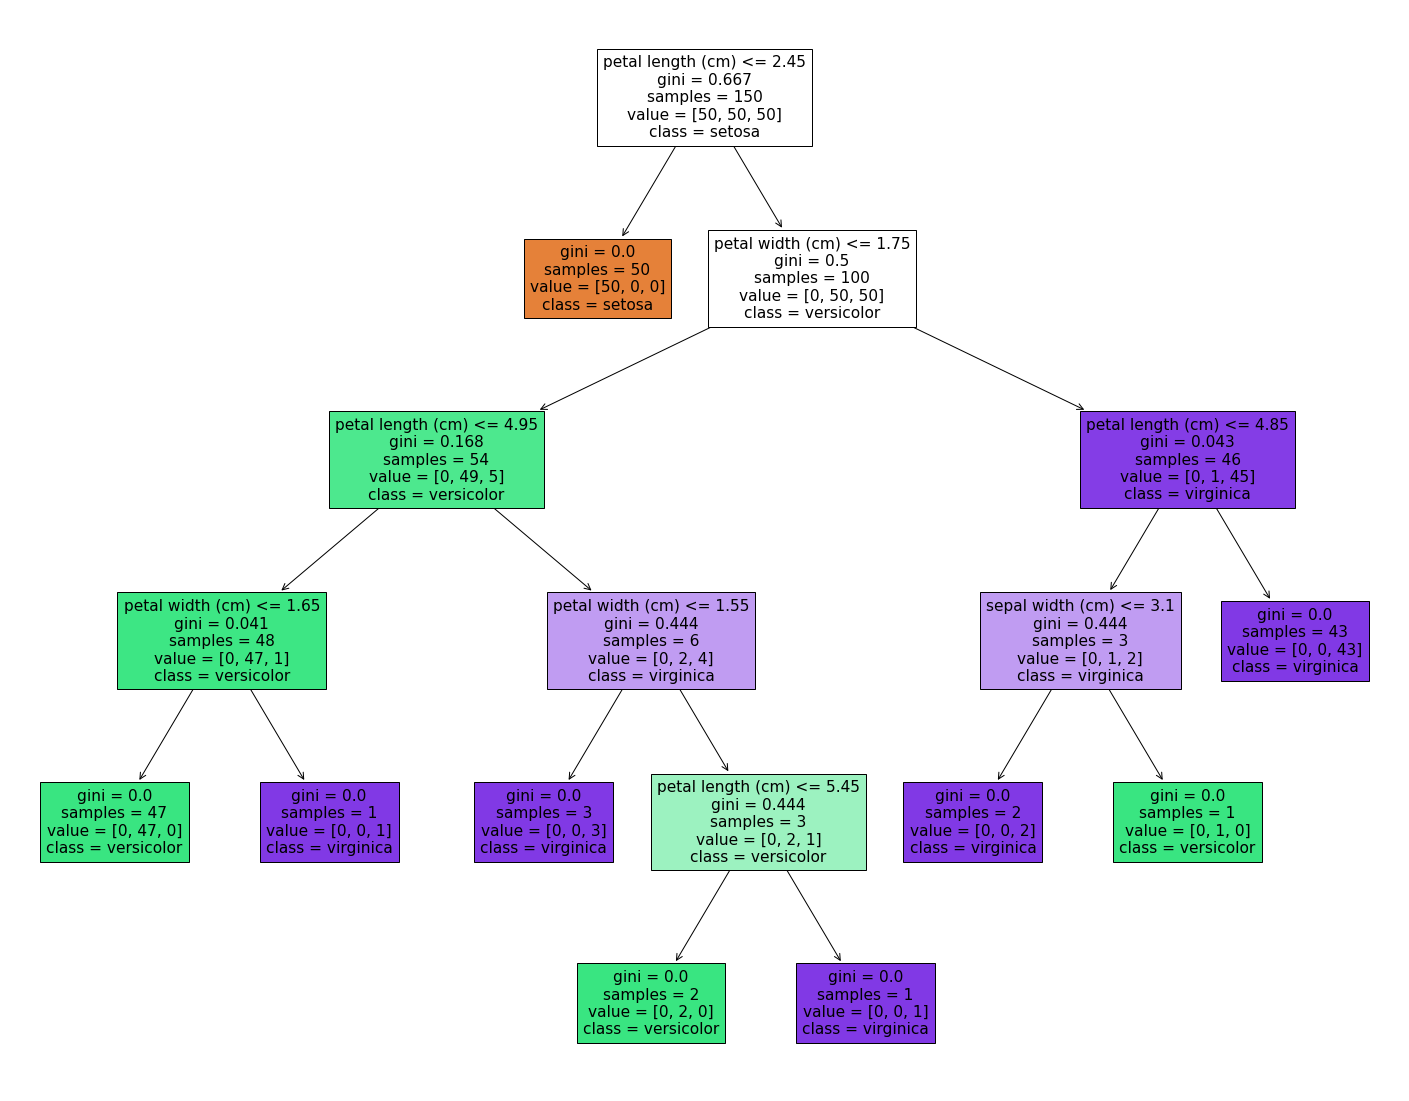

In [ ]:
# Visualize the results in a beautiful manner using sklearn plot_tree
# Look documentation for modifying fonts: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
# TODO: Write accuracy function here
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X, y, test_size=0.25, random_state=6)
y_pred=clf.predict(X_s_test)
from sklearn.model_selection import train_test_split

print("Accuracy:",metrics.accuracy_score(y_s_test, y_pred))

Accuracy: 1.0


In [ ]:
# TODO: Print 15 hyperparam settings along with accuracy
import sklearn.metrics as metrics
for i in range(5,13):
  clf1=DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= i)
  clf1.fit(X,y)
  X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X, y, test_size=0.25, random_state=6)
  y_pred=clf1.predict(X_s_test)
  print('PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth=',i,']','  ',"Accuracy:",metrics.accuracy_score(y_s_test, y_pred))
for i in range(35,43):
  clf1=DecisionTreeClassifier(criterion = "entropy", splitter = 'random',min_samples_split=4, max_leaf_nodes = 5, min_samples_leaf = 5, max_depth= i)
  clf1.fit(X,y)
  X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X, y, test_size=0.25, random_state=6)
  y_pred=clf1.predict(X_s_test)
  print('PARAMS[criterion = "entropy", splitter = "random",min_samples_split=4, max_leaf_nodes = 5, min_samples_leaf = 5, max_depth=',i,']','  ',"Accuracy:",metrics.accuracy_score(y_s_test, y_pred))

PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5 ]    Accuracy: 1.0
PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 6 ]    Accuracy: 0.9210526315789473
PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 7 ]    Accuracy: 0.9473684210526315
PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 8 ]    Accuracy: 0.9473684210526315
PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 9 ]    Accuracy: 0.9473684210526315
PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 10 ]    Accuracy: 0.8947368421052632
PARAMS[criterion = "gini", splitter = "random", max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 11 ]    Accuracy: 0.9210526315789473
PARAMS[criterion = "gini", splitter = "random",

### How to visualize decision trees using graphviz

If you get runtime error with graphviz, refer to
- https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

In [42]:
import graphviz
# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

NameError: name 'clf' is not defined

In [43]:
# initialise and then Fit the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [44]:
graph.render("decision_tree_graphivz")

NameError: name 'graph' is not defined

In [46]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

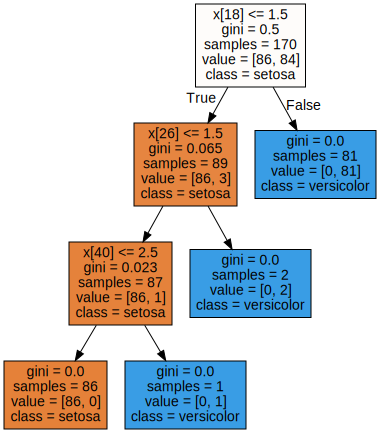

In [48]:
# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format
dot_data = tree.export_graphviz(clf, out_file=None,
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph